## Домашняя работа 3

### VK API

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

Установите библиотеку [vk](https://github.com/dimka665/vk) для работы с VK API в Python:

** pip install vk **

Импортируйте данную библиотеку: 

In [2]:
import vk

После установки модуля, необходимо [создать приложение на сайте VK](https://vk.com/dev/native_create)

После регистрации приложения, понадобится только его **ID**. Его можно найти во вкладке **Настройки**.

Теперь создайте файл credentials.py (подобно тому, которой мы создавали на семинаре 8), который должен выглядеть следующим образом:

In [ ]:
id_app = '... ID приложения ...'
login = '... Ваш логин в вк ...'
password = '... Ваш пароль в вк ...'

Авторизуйтесь:

In [3]:
#авторизация с помощью service token
session = vk.Session(access_token = '33e34c1b33e34c1b33e34c1b593382329c333e333e34c1b6976ada5b7947af10e0ee700')
vk_api = vk.API(session)

При такой авторизации нужно указывать не только логин, пароль и ID приложения, но и то, к чему мы хотим получить доступ. Для того чтобы данный код сработал корректно, при авторизации нужно указать дополнительно аргумент с названием scope и перечислить через запятую те методы, доступ к которым мы хотим получить. Например:

In [19]:
#session = vk.AuthSession(id_app, login, password, scope='wall')
#vk_api = vk.API(session)

2018-03-01 03:17:57,395 vk    mixins:127 INFO: Getting permissions


В данном примере я запрашиваю доступ к стене. Названия методов, к которым возможно получить доступ можно посмотреть на [этой странице документации](https://vk.com/dev/objects).

**Задача 1. Формирование корпуса текстов** (10 баллов) 

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной. 

С помощью [wall.get](https://vk.com/dev/wall.get) скачайте посты данных групп и сформируйте корпуса текстов, используя возможности [pandas](https://pythonspot.com/category/pandas/).

In [3]:
import pandas as pd

In [5]:
def get_group_posts(group_id, posts_count): #скачать posts_count*100 постов группы
    
    corpus = []
    for k in range(posts_count):
        response = vk_api.wall.get(owner_id = group_id, count = 100, filter = 'owner', v = '5.73', offset = 100*k)
        corpus.extend([response['items'][i]['text'] for i in range(len(response['items'])) if response['items'][i]['text']])
    return corpus
   

Были выбраны 4 группы ВКонтакте. Тематика групп:
* искусство https://vk.com/arttraffic2
* джаз https://vk.com/jazzcalendar
* математика https://vk.com/matematura
* эмиграция, обучение за рубежом https://vk.com/emigration_help

In [12]:
corpus_jazz = get_group_posts(-43416763, 10) #988

In [13]:
corpus_art = get_group_posts(-52526415, 10) #958

In [14]:
corpus_math = get_group_posts(-109232148, 10) #959

In [15]:
corpus_migrate = get_group_posts(-50560478, 12) #993

In [16]:
corpus = pd.DataFrame(columns = ['jazz', 'art', 'math', 'places'])

In [17]:
#из скачанных текстов взяты по 900 штук для общего датафрейма
corpus['jazz'] = corpus_jazz[:900]
corpus['art'] = corpus_art[:900]
corpus['math'] = corpus_math[:900]
corpus['places'] = corpus_migrate[:900]

In [18]:
corpus.head()

,jazz,art,math,places
0,[club43416763|От серьёзного до популярного – т...,Психология сказки: Мария-Луиза фон Франц\n \nМ...,"Все ближе экзамен, и в топ читательских предпо...",ВСЕ СПОСОБЫ ЛЕГАЛЬНО УЕХАТЬ В США НА ПМЖ\n\nСП...
1,[club43416763|Четыре золотые струны Банни Брюн...,Деревянные брошки по произведениям искусства о...,Что нас ждет в мартовском номере Квантика.\n1)...,Куда уехать жить и работать: определяемся с вы...
2,[club43416763|Сделано в СССР!] \n \nДорогие др...,SQÜRL - EP #260 (2017)\n\nКосмическая музыка Д...,Метод рационализации в решении неравенств вовс...,Во сколько обходится в среднем ежемесячное про...
3,"[club43416763|В это время всё оттаивает, да и ...",[club37196179|pulp art] — очень приятный пабли...,В систему Статград добавлены очередные номера ...,"Аргентина,Патагония"
4,"Гитарист-виртуоз Илья ЛУШТАК (New York, USA) п...",Документальный фильм Джима Джармуша «Gimme Dan...,Калейдоскоп –– это детская игрушка: яркие кусо...,Последние данные о зарплате в Канаде по провин...


In [19]:
corpus.to_csv('raw_posts.csv', encoding = 'utf-8', index = 0) #сохраним датафрейм, чтобы не скачивать заново

In [51]:
corpus = pd.read_csv('raw_posts.csv', encoding = 'utf-8')

**Задача 2. Предобработка ** (15 баллов)

Предобработайте корпуса текстов: 
* Очистите тексты от мусора, используя [регулярные выражения](https://docs.python.org/2/library/re.html)
* [Лемматизируйте текст](https://github.com/arinaaageeva/Lemmatization)
* Удалите стоп-слова

Список стоп-слов можно получить с помощью модуля [stop-words](https://pypi.python.org/pypi/stop-words)

In [53]:
import re

In [11]:
from stop_words import get_stop_words

In [12]:
stopwords = get_stop_words('russian')

In [56]:
len(stopwords)

421

In [57]:
import pymorphy2

In [58]:
morph = pymorphy2.MorphAnalyzer()

In [59]:
morph.parse('фрейда')[0].normal_form

'фрейд'

Функция предобработки: выделяет слова, лемматизирует, удаляет стоп-слова

In [60]:
from tqdm import tqdm

In [61]:
def preprocess(texts, stopwords):
    clean_texts = []
    for text in tqdm(texts):
        words = re.findall(r'[а-яё]+', text.lower())
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in stopwords]
        clean_texts.append(' '.join(lemmas))
    return clean_texts

In [62]:
preprocess(corpus.math[:2], stopwords)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  7.17it/s]


['близкий экзамен топ читательский предпочтение выбиться методический указание подготовка егэ наш издательство разный книга один базовый экзамен профильный пособие устроить одинаково задание сгруппировать диагностический работа тематический тренинг один тренинг каждый задача экзамен тренинг состоять задание подготовительный задание зачётный уровень сложность подготовительный задание увеличиваться задача задача последний задание достигать уровень сложность реальный задание экзамен уровень зачётный задание целое соответствовать уровень сложность реальный задание егэ подготовка решение задание краткий ответ следовать вначале решить один диагностический работа выявление проблемный зона знание навык решение задача повторить вызвать затруднение материал учебник решить соответствующий тренинг перейти следующий диагностический работа оценка успешность повторение закрепление навык решение задача часть краткий ответ аналогичный алгоритм рекомендовать подготовка решение задача развернуть решение 

In [63]:
corpus['jazz'] = preprocess(corpus.jazz, stopwords)
corpus['art'] = preprocess(corpus.art, stopwords)
corpus['math'] = preprocess(corpus.math, stopwords)
corpus['places'] = preprocess(corpus.places, stopwords)

100%|████████████████████████████████████████| 900/900 [03:14<00:00,  4.63it/s]


In [66]:
corpus.to_csv('vk_corpus.csv', encoding = 'utf-8', index = 0)

In [4]:
corpus = pd.read_csv('vk_corpus.csv', encoding = 'utf-8')

In [5]:
corpus.head()

,jazz,art,math,places
0,серьёзный популярный грош март германия дессау...,психология сказка мария луиз фон франц мария л...,близкий экзамен топ читательский предпочтение ...,способ легально уехать сша пмж способ лотерея ...
1,золотой струна банни брюнеть легендарный бас г...,деревянный брошка произведение искусство броше...,ждать мартовский номер квантик научный приключ...,уехать жить работать определяться выбор опреде...
2,сделать ссср дорогой друг март псков родиться ...,космический музыка джим джармуш противоречие м...,метод рационализация решение неравенство вовсе...,обходиться среднее ежемесячный проживание канада
3,оттаивать становиться мягкий весна похожий сим...,приятный паблик особа атмосфера вливаться,система статград добавить очередной номер журнал,аргентина патагония
4,гитарист виртуоз илья луштак приглашать рожден...,документальный фильм джим джармуш история игга...,калейдоскоп детский игрушка яркий кусочек стек...,последний дать зарплата канада провинция


In [6]:
corpus = corpus.dropna(how = 'any') #удалим тексты, которые стали пустыми после предобработки (содержались только хэштеги)

In [7]:
corpus.shape

(848, 4)

** Задача 3. Выделение признаков** (5 баллов)

Воспользуйтесь [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) для векторизации текстов. 

Сначала нужно создать и обучить vectorizer:

```

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=<сюда передайте список стоп слов>).fit(<сюда передайте весь корпус текстов>)
```

Что бы преообразовать тексты в векторное представление используйте метод transform:
```
tfidf_vectors = vectorizer.transform(<список текстов>)
```
Получение списка имён признаков:
```
features_names = vectorizer.get_features_name()
```
Для каждой группы получите список топ-токенов и выведите .

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
import numpy as np

In [9]:
def get_top_tokens(tfidf_matrix, features_names, n):
    mean_tfidf = tfidf_matrix.mean(axis = 0)
    mean = np.transpose(mean_tfidf).tolist()
    mean_tfidf_words = zip(features_names, mean)
    sorted_tfidf = sorted(mean_tfidf_words, key = lambda column: column[1], reverse = True)
    tokens, tfs = zip(*sorted_tfidf[:n])
    return tokens
    

In [15]:
#векторизуем тексты про искусство
vectorizer_art = TfidfVectorizer(stop_words = stopwords).fit(corpus.art)
tfidf_vect_art = vectorizer_art.transform(corpus.art)
features_names_art = vectorizer_art.get_feature_names()

In [18]:
#искусство - топ 20 токенов 
top_tokens_art = get_top_tokens(tfidf_vect_art, features_names_art, 20)
top_tokens_art

('фильм',
 'искусство',
 'книга',
 'история',
 'художник',
 'фотография',
 'кино',
 'мир',
 'век',
 'роман',
 'работа',
 'музыка',
 'режиссёр',
 'автор',
 'картина',
 'культура',
 'образ',
 'современный',
 'философия',
 'самый')

In [19]:
vectorizer_jazz = TfidfVectorizer(stop_words = stopwords).fit(corpus.jazz)
tfidf_vect_jazz = vectorizer_jazz.transform(corpus.jazz)
features_names_jazz = vectorizer_jazz.get_feature_names()

In [20]:
#джаз -  топ 20 токенов 
top_tokens_jazz = get_top_tokens(tfidf_vect_jazz, features_names_jazz, 20)
top_tokens_jazz

('альбом',
 'музыкант',
 'трек',
 'джазовый',
 'играть',
 'музыка',
 'джаз',
 'композиция',
 'запись',
 'оркестр',
 'саксофон',
 'группа',
 'записать',
 'свой',
 'музыкальный',
 'тенор',
 'фортепиано',
 'друг',
 'пианист',
 'лейбл')

In [21]:
vectorizer_math = TfidfVectorizer(stop_words = stopwords).fit(corpus.math)
tfidf_vect_math = vectorizer_math.transform(corpus.math)
features_names_math = vectorizer_math.get_feature_names()

In [22]:
#математика -  топ 20 токенов 
top_tokens_math = get_top_tokens(tfidf_vect_math, features_names_math, 20)
top_tokens_math

('задача',
 'математика',
 'книга',
 'задачка',
 'число',
 'теория',
 'математический',
 'геометрия',
 'решение',
 'субботний',
 'видео',
 'журнал',
 'наука',
 'треугольник',
 'точка',
 'олимпиада',
 'школьник',
 'автор',
 'номер',
 'воскресный')

In [23]:
vectorizer_places = TfidfVectorizer(stop_words = stopwords).fit(corpus.places)
tfidf_vect_places = vectorizer_places.transform(corpus.places)
features_names_places = vectorizer_places.get_feature_names()

In [24]:
#эмиграция -  топ 20 токенов 
top_tokens_places = get_top_tokens(tfidf_vect_places, features_names_places, 20)
top_tokens_places

('страна',
 'город',
 'работа',
 'нью',
 'йорк',
 'язык',
 'сша',
 'виза',
 'канада',
 'самый',
 'образование',
 'евро',
 'подписаться',
 'студент',
 'дом',
 'получить',
 'программа',
 'германия',
 'английский',
 'университет')

**Задача 4. Визуализация** (5 баллов)

Визуализируйте токены для каждого сообщества с помощью [WORDCLOUD](https://python-graph-gallery.com/wordcloud/)

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Искусство

In [35]:
wordcloud_art = \
    WordCloud(width=480, height=480, max_words = 20, background_color = 'white').generate(' '.join(corpus.art.values))

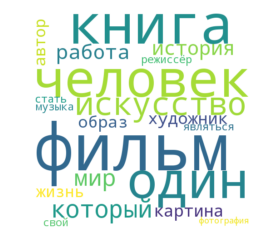

In [37]:
plt.imshow(wordcloud_art, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


Джаз

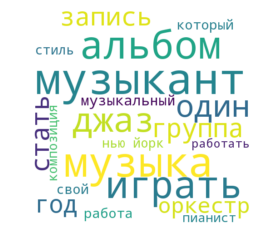

In [40]:
wordcloud_jazz = \
    WordCloud(width=480, height=480, max_words = 20, background_color = 'white').generate(' '.join(corpus.jazz.values))
plt.imshow(wordcloud_jazz, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Математика

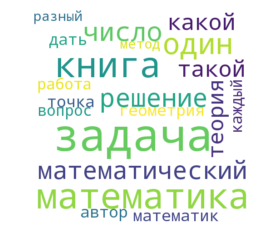

In [41]:
wordcloud_math = \
    WordCloud(width=480, height=480, max_words = 20, background_color = 'white').generate(' '.join(corpus.math.values))
plt.imshow(wordcloud_math, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Эмиграция

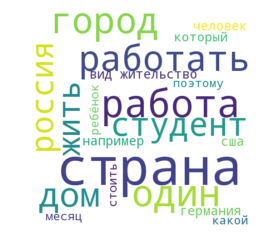

In [42]:
wordcloud_places = \
    WordCloud(width=480, height=480, max_words = 20, background_color = 'white').generate(' '.join(corpus.places.values))
plt.imshow(wordcloud_places, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Задача 5. Поиск коллокаций** (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI

In [53]:
#составление вероятностного словаря слов 
def vocab(texts_list):
    lemmas = []
    for text in texts_list:
        lemmas.extend([word for word in text.split()])
    dictionary = {}
    n = len(lemmas)
    #print(n)
    for lemma in lemmas:
        dictionary.setdefault(lemma, 0)
        dictionary[lemma] += 1/n
    return dictionary

In [65]:
#вероятностный словарь биграмм
def bigram_vocab(text_list):
    bigrams = []
    for text in text_list:
        word_list = text.split()
        bigrams.extend([w1 + ' ' + w2 for w1, w2 in zip(word_list[:-1], word_list[1:])])
    dictionary = {}
    n = len(bigrams)
    #print(n)
    for bigram in bigrams:
        dictionary.setdefault(bigram, 0)
        dictionary[bigram] += 1/n
    return dictionary

In [127]:
#вычисление PMI для биграммы
def pmi(p_1w, p_2w, p_bigram):
    return np.log(p_bigram/(p_1w * p_2w))

In [135]:
#словарь биграмм с PMI
def pmi_vocab(text_list):
    word_dictionary = vocab(text_list)
    bigram_dictionary = bigram_vocab(text_list)
    for key, value in bigram_dictionary.items():
        w1, w2 = key.split()
        p1 = word_dictionary[w1]
        p2 = word_dictionary[w2]

        bigram_dictionary[key] = pmi(p1, p2, value)
    return bigram_dictionary
        
        

In [139]:
pmi_dict_art = pmi_vocab(corpus.art)

In [141]:
pmi_top_art = sorted(pmi_dict_art.items(), key = lambda item:item[1], reverse = True)[:20]
collocations_art, pmi_art = zip(*pmi_top_art)
collocations_art

('лось откачивать',
 'петушок тулеев',
 'ниппур датироваться',
 'клингера кавалли',
 'луисвилльский торчок',
 'макото такато',
 'хорасанец нимый',
 'махасангхик санкхие',
 'окислить шуруп',
 'сдоба добрить',
 'мирло ладерман',
 'восколебаться иссохнуть',
 'салдан нэтан',
 'охранный грамота',
 'микробиос космоантропос',
 'антимиметичный антиреальный',
 'дост вшесться',
 'предательница обьектом',
 'профинансировать недешевый',
 'рейнолдс стабс')

In [143]:
pmi_dict_jazz = pmi_vocab(corpus.jazz)

In [144]:
pmi_top_jazz = sorted(pmi_dict_jazz.items(), key = lambda item:item[1], reverse = True)[:20]
collocations_jazz, pmi_jazz = zip(*pmi_top_jazz)
collocations_jazz

('вымереть моллюск',
 'мэнни дайса',
 'многоклеточный ископаемое',
 'полис миннесый',
 'неуплата алименты',
 'розарио джулиани',
 'щенок безумствовать',
 'покатиться откос',
 'туура косок',
 'борщев пояс',
 'огород лачуга',
 'шаблон актуализировать',
 'гастон буэно',
 'брукм йер',
 'новиков злоязычный',
 'бьюфорд джастис',
 'пениться вопить',
 'фредрик льюнгквист',
 'битловский нега',
 'задолженность общественно')

In [145]:
pmi_dict_math = pmi_vocab(corpus.math)

In [146]:
pmi_top_math = sorted(pmi_dict_math.items(), key = lambda item:item[1], reverse = True)[:20]
collocations_math, pmi_math = zip(*pmi_top_math)
collocations_math

('подружка сострить',
 'монпелье оцифровать',
 'интенсивно развивающийся',
 'отвращение приверженность',
 'повстречаться очаровательный',
 'провозглашать оптимистичный',
 'кислый молоко',
 'полусфера верхушка',
 'салим руслан',
 'выверяться досконально',
 'берендеев поляна',
 'сигма тау',
 'полтавский бородинский',
 'савчук шейпак',
 'дальность сокращаться',
 'ожерелие соображеняй',
 'убелить седина',
 'всемирный тяготение',
 'непохожесть эквивалентный',
 'хирцебруха присуждение')

In [147]:
pmi_dict_places = pmi_vocab(corpus.places)

In [148]:
pmi_top_places = sorted(pmi_dict_places.items(), key = lambda item:item[1], reverse = True)[:20]
collocations_places, pmi_places = zip(*pmi_top_places)
collocations_places

('фрукторианство веганство',
 'добротный прилизать',
 'гассо платтнера',
 'программировать материя',
 'патология дефектология',
 'поплавковый клапан',
 'покряхтеть нехотя',
 'ипатьев сикорский',
 'сток дождев',
 'транссибирский магистраль',
 'мотороллер помчаться',
 'пелёнка памперс',
 'круглогодичный экстрим',
 'бобо образный',
 'навальный припоминать',
 'бдение окошечко',
 'бунт растрата',
 'шестьсот семьсот',
 'осветитель хореограф',
 'розетка подзарядка')